In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from opqua.model import Model

Host-host transmission model with susceptible and infected hosts in a single population scenario, illustrating pathogen evolution through _de novo_ mutations and intra-host competition.

When two pathogens with different genomes meet in the same host (or vector), the pathogen with the most fit genome has a higher probability of being transmitted to another host (or vector). In this case, the transmission rate does NOT vary according to genome. Once an event occurs, however, the pathogen with higher fitness has a higher likelihood of being transmitted.

Here, we define a landscape of stabilizing selection where there is an optimal genome and every other genome is less fit, but fitness functions can be defined in any arbitrary way (accounting for multiple peaks, for instance, or special cases for a specific genome sequence).

## Model initialization and setup

### Create a new `Model` object

In [2]:
model = Model()

### Define an optimal genome

In [3]:
my_optimal_genome = 'BEST'

### Define a custom fitness function for the host
Fitness functions must take in **one** argument and return a positive number as a fitness value. Here, we take advantage of one of the preset functions, but you can define it any way you want!

**Stabilizing selection:** any deviation from the "optimal genome" sequence results in an exponential decay in fitness to the `min_fitness` value at the maximum possible distance. Here we use strong selection, with a very low minimum fitness.

In [4]:
def myHostFitness(genome):
    return Model.peakLandscape(
        genome, 
            # Genome to be evaluated (String)
        peak_genome=my_optimal_genome, 
            # The genome sequence to measure distance against, has value of 1 (String)
        min_value=1e-10
            # Minimum value at maximum distance from optimal genome (number > 0)
        )

### Define a Setup for our system

In [5]:
model.newSetup(     # Create a new setup dictionary
    'my_setup',
        # Name of the setup (a dictionary).
    preset='host-host',
        # Use default 'host-host' parameters.
    possible_alleles='ABDEST',
        # Define "letters" in the "genome", or possible alleles for each locus.
        # Each locus can have different possible alleles if you define this
        # argument as a list of strings, but here, we take the simplest
        # approach.
    num_loci=len(my_optimal_genome),
        # Define length of "genome", or total number of alleles.
    fitnessHost=myHostFitness,
        # Assign the fitness function we created (could be a lambda function)
        # Function that evaluates relative fitness in head-to-head competition for 
        # different genomes within the same host (function object, takes a String 
        # argument and returns a number >= 0)
    mutate_in_host=5e-2
        # Modify de novo mutation rate of pathogens when in host to get some
        # evolution!
    )

### Create a population in our model

Create a new population of 100 hosts and 0 vectors called `my_population`. The population uses parameters stored in `my_setup`

In [6]:
model.newPopulation(            # Create a new Population object with setup parameters
    'my_population',
        # Unique identifier for this population in the model 
    'my_setup', 
        # Setup object with parameters for this population
    num_hosts=100
        # Number of hosts to initialize population with
    )

### Manipulate hosts and vectors in the population
We will start off the simulation with a suboptimal pathogen genome, _BADD_. Throughout the course of the simulation, we should see this genome be outcompeted by more optimal pathogen genotypes, culminating in the optimal genome, _BEST_, which outcompetes all others.

In [7]:
model.addPathogensToHosts(    # Add specified pathogens to random hosts
    'my_population',
        # ID of population to be modified
    {'BADD':10} 
        # Dictionary containing pathogen genomes to add as keys and 
        # number of hosts each one will be added to as values
    )

## Model simulation

In [8]:
model.run(  # Simulate model for a specified time between two time points
    0,      # Initial time point
    200     # Final time point
    )

Simulating time: 78.97948973195574, event: RECOVER_HOST
Simulating time: 135.48163218588937, event: CONTACT_HOST_HOST
Simulating time: 190.57184886079324, event: CONTACT_HOST_HOST
Simulating time: 200.09229952782525 END


## Output data manipulation and visualization

### Create a table with the results of the given model history

In [9]:
data = model.saveToDataFrame(   
        # Creates a pandas Dataframe in long format with the given model history, 
        # with one host or vector per simulation time in each row
    'fitness_function_mutation_example.csv' 
        # File path and name to save model data
    )
data

Saving file...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Batch computation too fast (0.19682802009582523s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Batch computation too fast (0.010696649551391602s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done  44 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Batch computation too fast (0.01260995864868164s.) Setting batch_size=8.
[Parallel(n_jobs=8)]: Done  76 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 124 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Batch computation too fast (0.021216392517089844s.) Setting batch_size=16.
[Parallel(n_jobs=8)]: Done 224 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Batch computation too fast (0.028287172317504883s.) Setting batch_size=32.
[Parallel(n_jobs=8)]: Done 408 t

...file saved.


,Time,Population,Organism,ID,Pathogens,Protection,Alive
0,0.0,my_population,Host,my_population_0,NaN,NaN,True
1,0.0,my_population,Host,my_population_1,NaN,NaN,True
2,0.0,my_population,Host,my_population_2,NaN,NaN,True
3,0.0,my_population,Host,my_population_3,NaN,NaN,True
4,0.0,my_population,Host,my_population_4,NaN,NaN,True
...,...,...,...,...,...,...,...
286295,200.0,my_population,Host,my_population_95,NaN,NaN,True
286296,200.0,my_population,Host,my_population_96,BEST,NaN,True
286297,200.0,my_population,Host,my_population_97,BEST,NaN,True
286298,200.0,my_population,Host,my_population_98,BEST,NaN,True


### Create a plot to track pathogen genotypes across time

1 / 155 genotypes processed.
2 / 155 genotypes processed.
3 / 155 genotypes processed.
4 / 155 genotypes processed.
5 / 155 genotypes processed.
6 / 155 genotypes processed.
7 / 155 genotypes processed.
8 / 155 genotypes processed.
9 / 155 genotypes processed.
10 / 155 genotypes processed.
11 / 155 genotypes processed.
12 / 155 genotypes processed.
13 / 155 genotypes processed.
14 / 155 genotypes processed.
15 / 155 genotypes processed.
16 / 155 genotypes processed.
17 / 155 genotypes processed.
18 / 155 genotypes processed.
19 / 155 genotypes processed.
20 / 155 genotypes processed.
21 / 155 genotypes processed.
22 / 155 genotypes processed.
23 / 155 genotypes processed.
24 / 155 genotypes processed.
25 / 155 genotypes processed.
26 / 155 genotypes processed.
27 / 155 genotypes processed.
28 / 155 genotypes processed.
29 / 155 genotypes processed.
30 / 155 genotypes processed.
31 / 155 genotypes processed.
32 / 155 genotypes processed.
33 / 155 genotypes processed.
34 / 155 genotypes 

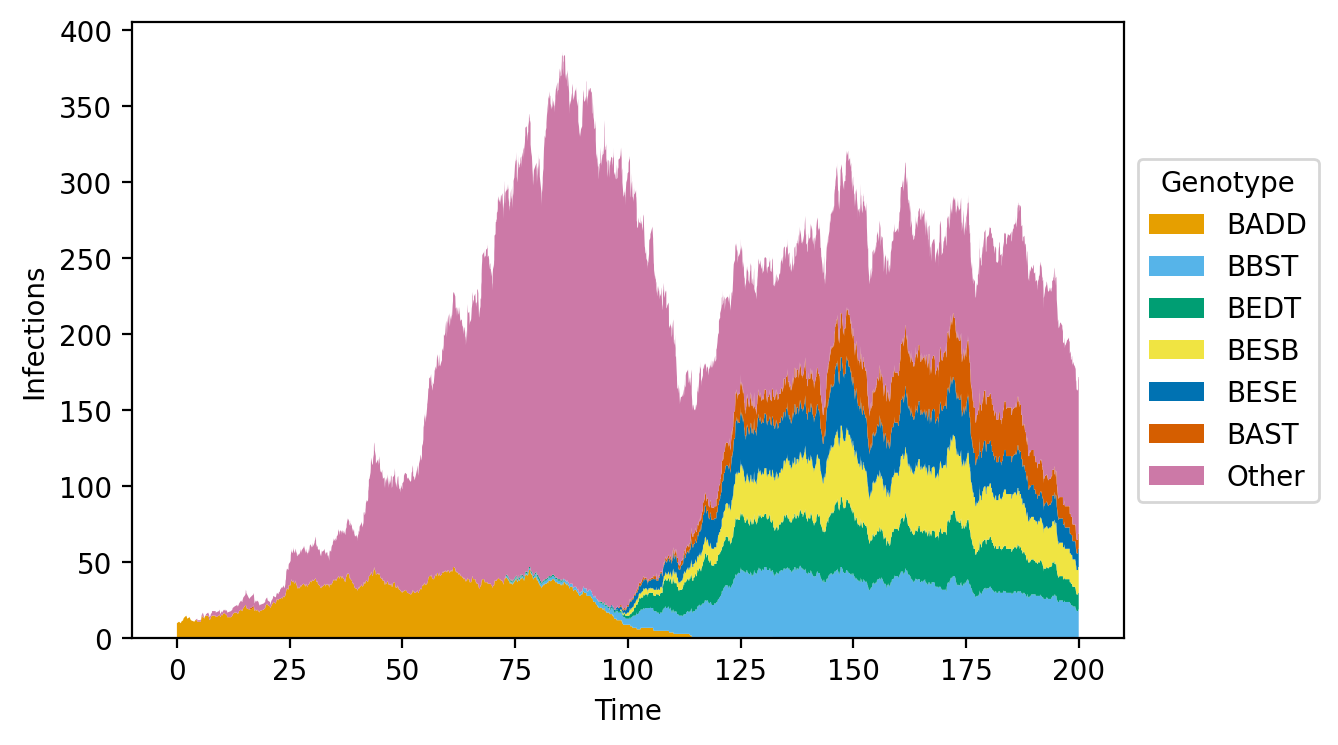

In [10]:
graph_composition = model.compositionPlot(
        # Create a plot to track pathogen genotypes across time
    'fitness_function_mutation_example_composition.png', 
        # File path, name, and extension to save plot under
    data,
        # Dataframe with model history as produced by saveToDf function
    num_top_sequences=6,
        # Track the 6 most represented genomes overall (remaining genotypes are
        # lumped into the "Other" category).
    track_specific_sequences=['BADD']
        # Include the initial genome in the graph if it isn't in the top 6.
    )

### Create a heatmap and dendrogram for pathogen genomes

Generate a heatmap and dendrogram for the top 15 genomes, include the ancestral genome _BADD_ in the phylogeny. Besides creating the plot, outputs the pairwise distance matrix to a csv file as well.

/home/acs98/miniconda3/envs/opqua/lib/python3.9/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


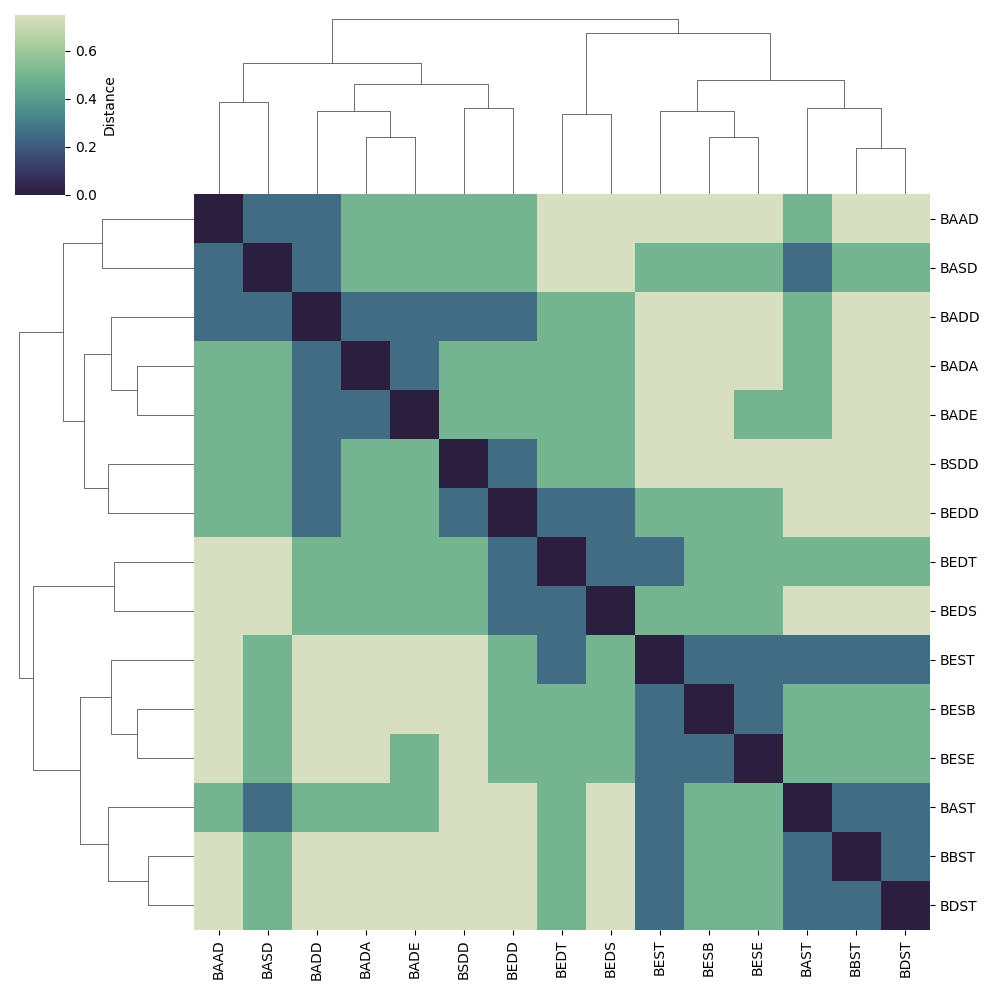

In [11]:
graph_clustermap = model.clustermap(    
        # Create a heatmap and dendrogram for pathogen genomes in data passed
    'fitness_function_mutation_example_clustermap.png', 
        # File path, name, and extension to save plot under
    data,
        # Dataframe with model history as produced by saveToDf function
    save_data_to_file='fitness_function_mutation_example_pairwise_distances.csv',
        # File path, name, and extension to save data under
    num_top_sequences=15,
        # How many sequences to include in matrix
    track_specific_sequences=['BADD']
        # Specific sequences to include in matrix
    )

### Create a normal compartment plot
Notice the total number of infections in the composition plot can exceed the number of infected hosts in the compartment plot. This happens because a single host infected by multiple genotypes is counted twice in the former, but not the latter.

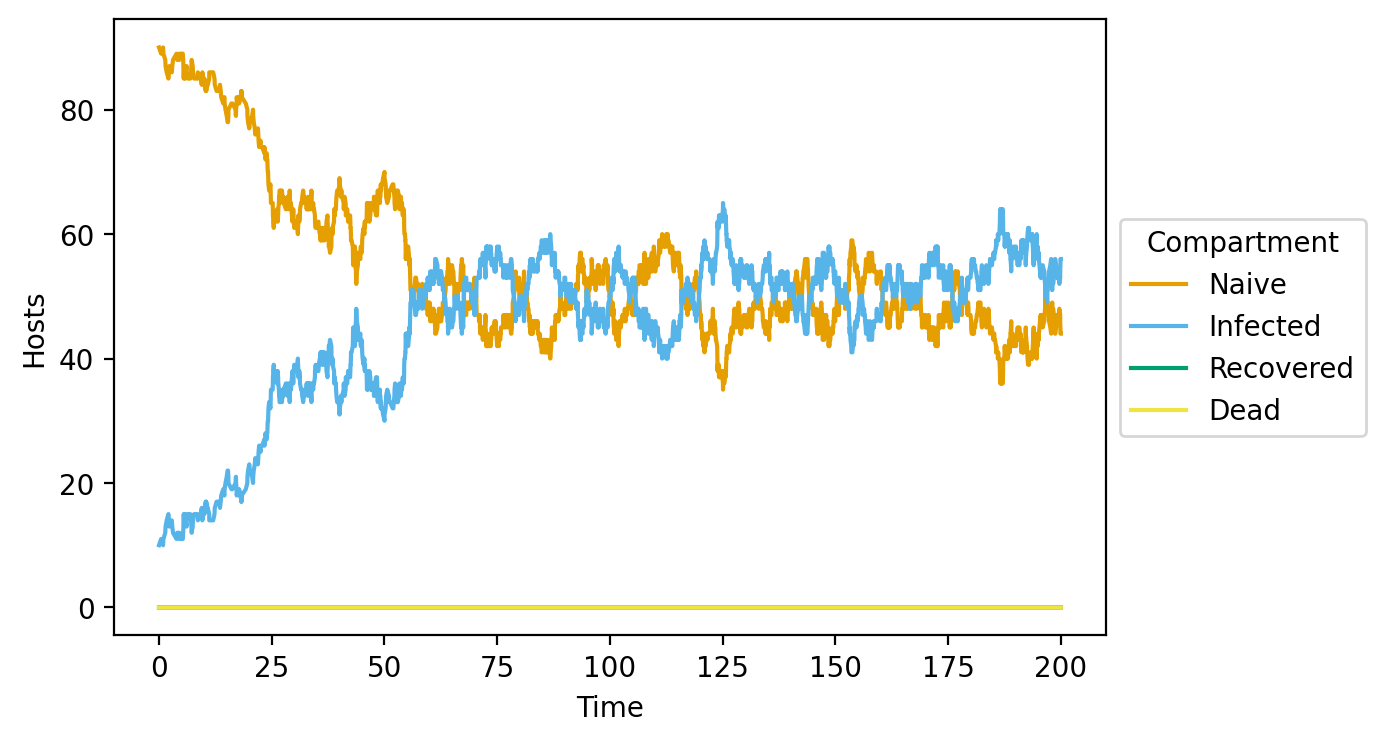

In [12]:
graph_compartments = model.compartmentPlot(
        # Create plot with number of naive, infected, recovered, dead hosts/vectors vs. time.
    'fitness_function_example_reassortment_compartments.png', 
        # File path, name, and extension to save plot under
    data
        # Dataframe with model history as produced by saveToDf function
    )